# Radar Recognition

### This script contains the following:

#### 1. Importing Libraries
#### 2. Loading and Pre-processing Weather Images
#### 3. Compiling and Running
#### 4. Results
#### 5. Bonus Task

### 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

### 2. Loading and Pre-processing Weather Images

In [6]:
# Download the weather images and put them in a directory

path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets\Weather'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [7]:
# This will load in the pictures and rescale them to 250x250 pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [8]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Compiling and Running

In [10]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16


C:\Users\16307\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 472ms/step - accuracy: 0.4919 - loss: 0.1472 - val_accuracy: 0.7593 - val_loss: 0.0939
Epoch 2/16
 1/75 ━━━━━━━━━━━━━━━━━━━━ 32s 439ms/step - accuracy: 0.7500 - loss: 0.0750

C:\Users\16307\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7500 - loss: 0.0750 - val_accuracy: 0.8102 - val_loss: 0.0803
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 440ms/step - accuracy: 0.7510 - loss: 0.0807 - val_accuracy: 0.6620 - val_loss: 0.1114
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8333 - loss: 0.0693 - val_accuracy: 0.6343 - val_loss: 0.1107
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 513ms/step - accuracy: 0.7670 - loss: 0.0790 - val_accuracy: 0.8194 - val_loss: 0.0667
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9167 - loss: 0.0373 - val_accuracy: 0.8241 - val_loss: 0.0662
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 511ms/step - accuracy: 0.8164 - loss: 0.0653 - val_accuracy: 0.7731 - val_loss: 0.0888
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.8056 - val_loss: 0.0771
Epoch 9/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.8272 - loss: 0.0603 - val_accuracy: 0.7778 - val_

### 4. Results

In [12]:
results = pd.DataFrame(model.history.history)

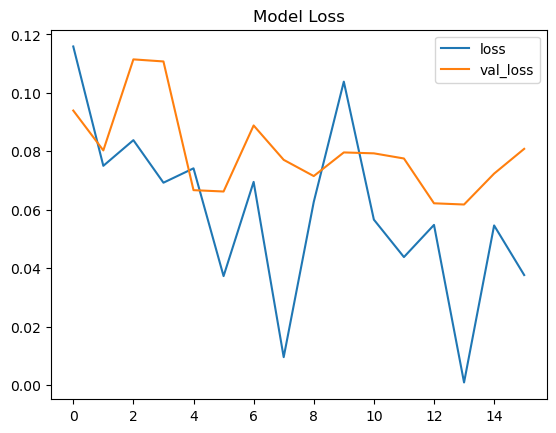

In [13]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

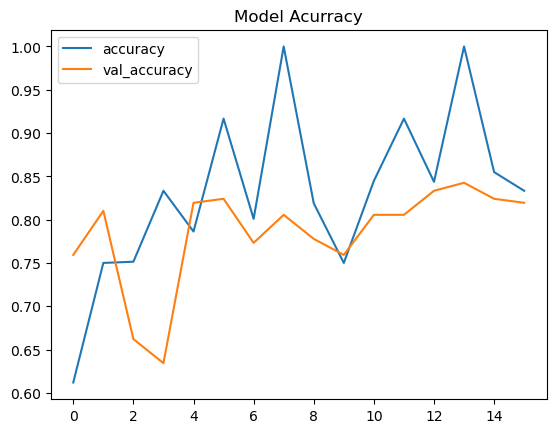

In [14]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [15]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8333333134651184, Val_Accuracy: 0.8194444179534912
Loss: 0.03765743598341942, Val_Loss: 0.0808272510766983


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step


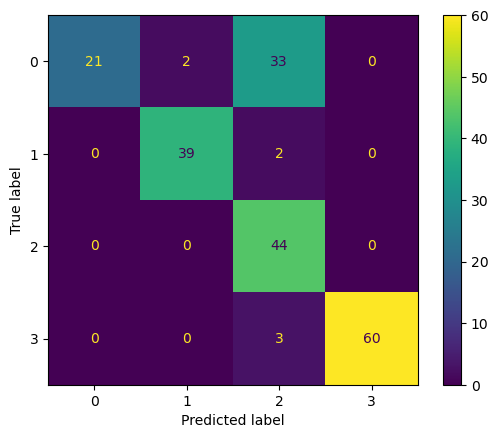

In [16]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


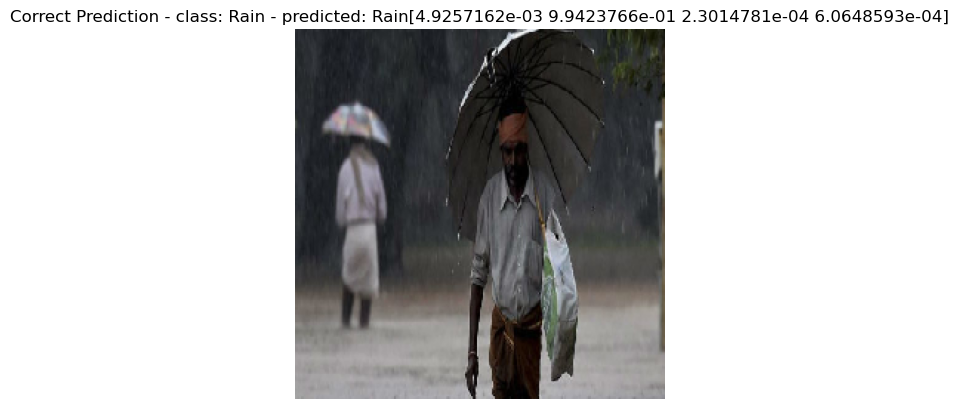

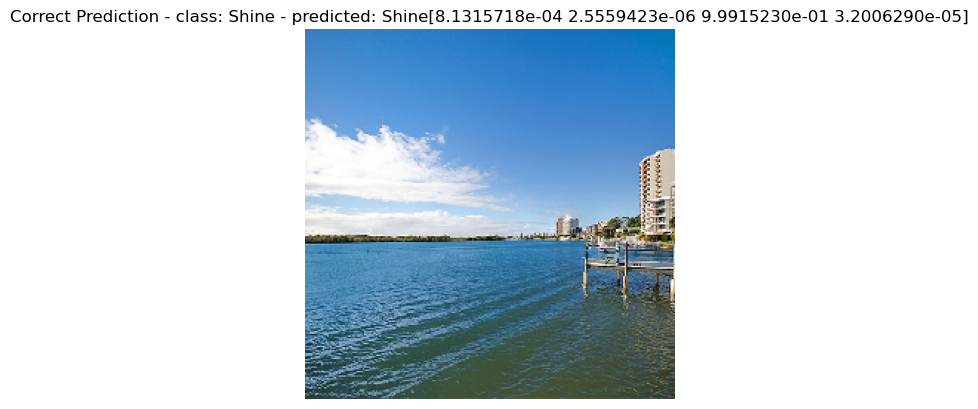

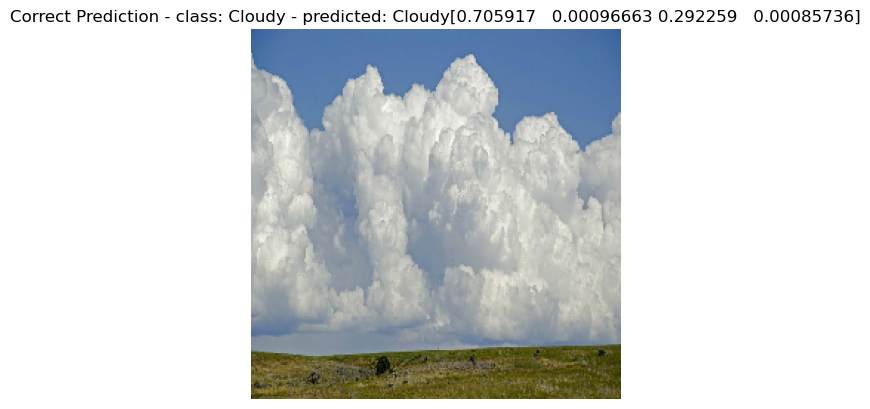

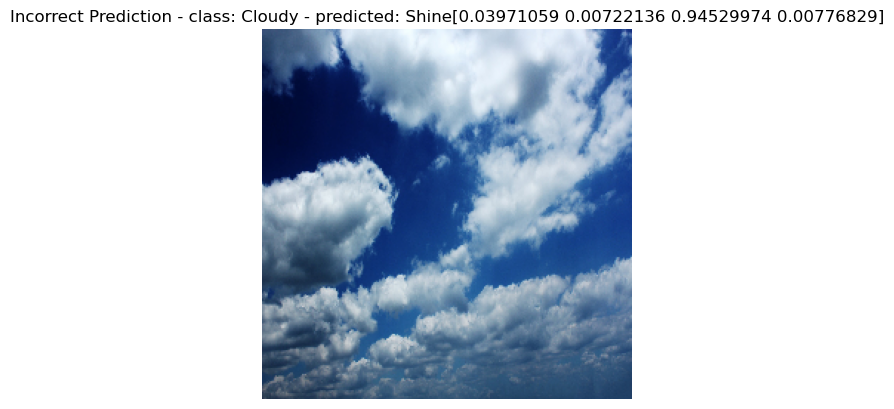

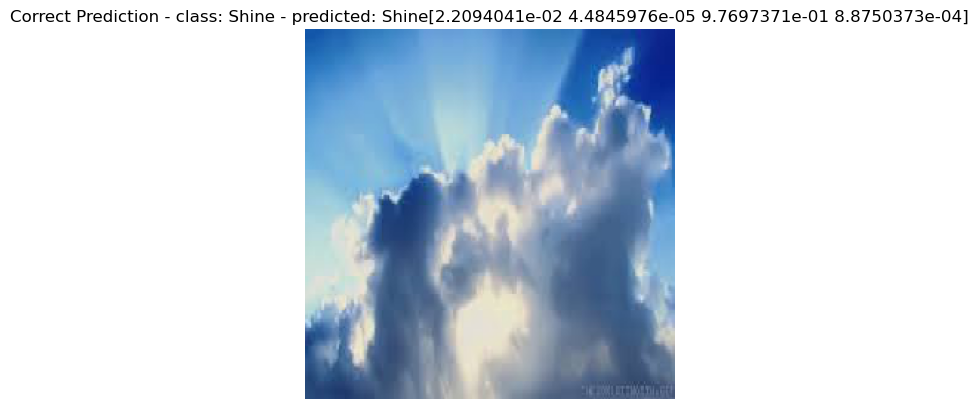

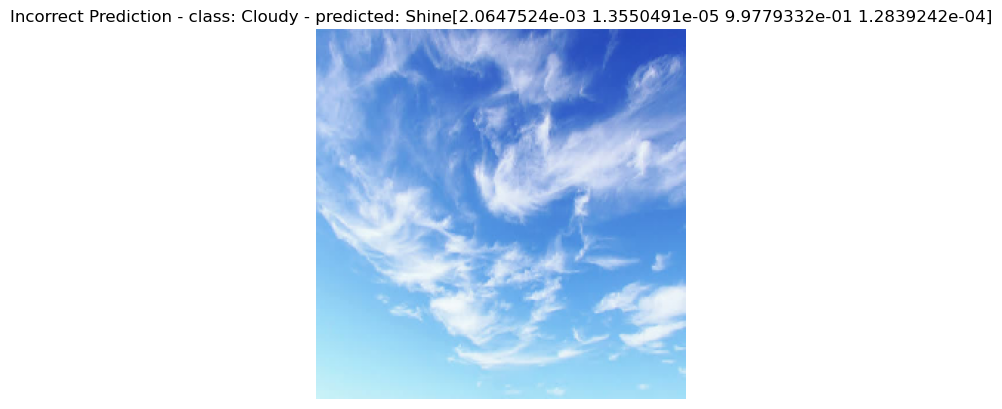

In [18]:
predict_one(model, 6) # <-- You can show multiple pictures with this command. Just fill in the number you want to see.